# Data Cleaning and Wrangling Process

After completing the Exploratory Data Analysis (EDA) phase, I proceeded to the next step in my data analysis journey by creating a notebook dedicated to cleaning and wrangling the dataset. This crucial stage involves addressing issues such as null values, unnecessary columns, outliers, and incorrectly formatted data.

The first task was to identify and handle null values within the dataset. I used various techniques such as imputation or removal based on the nature of the missing data and its impact on the analysis. This ensures that the dataset is robust and doesn't introduce biases into the subsequent analysis. To streamline the dataset and focus on relevant features, I carefully assessed each column's significance. Columns deemed unnecessary for the analysis were removed to simplify the dataset without compromising the integrity of the insights.

Outliers can significantly impact the statistical analysis. I employed statistical methods or visualization techniques to identify and address outliers appropriately. This step ensures that extreme values do not skew the overall patterns and trends in the data. Inconsistencies in data formatting can lead to errors and hinder analysis. I systematically reviewed the dataset for any inconsistencies and applied appropriate corrections. This included standardizing date formats, ensuring numerical consistency, and addressing any other format-related issues.

By executing these data cleaning and wrangling steps, I have prepared a refined dataset ready for the subsequent stages of analysis. This process not only enhances the accuracy of the results but also sets the foundation for more effective and meaningful data-driven insights.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

file_path = '../data/PS_20174392719_1491204439457_log.csv'
# Loading the CSV file
df = pd.read_csv(file_path, nrows=10000)

In [13]:
import os

# Set the file path for saving the processed data
output_file_path = '../data/process_data_chunk.csv'

# Define the chunk size based on memory capacity
chunk_size = 5000

# Initialize a list to store processed chunks
processed_chunks = []

# Define numerical and categorical features
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
categorical_features = ['type']  # Adjust based on your actual categorical features

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# Fit the preprocessor on the sample data
preprocessor.fit(df)

# Iterate through chunks in the CSV file
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Apply the preprocessing to each chunk
    x_chunk = chunk.drop('isFraud', axis=1)
    y_chunk = chunk['isFraud']
    processed_X_chunk = preprocessor.transform(chunk)

    # Convert the processed chunk back to a DataFrame (optional, if needed)
    numeric_features_processed = [f'{feature}_scaled' for feature in numerical_features]
    categorical_features_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_features = numeric_features_processed + list(categorical_features_encoded)
    processed_chunk_df = pd.DataFrame(processed_X_chunk, columns=all_features)
    processed_chunk_df['isFraud'] = y_chunk.reset_index(drop=True)

    # Store the processed DataFrame
    processed_chunks.append(processed_chunk_df)

# Concatenate all processed chunks into a single DataFrame
processed_df = pd.concat(processed_chunks, ignore_index=True)
processed_df.drop('isFraud_scaled', axis=1, inplace=True)

# Save the processed DataFrame to a CSV file
processed_df.to_csv(output_file_path, index=False)

In [14]:
processed_df.head(100000)

,amount_scaled,oldbalanceOrg_scaled,newbalanceOrig_scaled,oldbalanceDest_scaled,newbalanceDest_scaled,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,-0.351893,-0.338924,-0.346111,-0.349105,-0.363796,0.0,0.0,0.0,1.0,0.0,0
1,-0.381843,-0.408641,-0.410710,-0.349105,-0.363796,0.0,0.0,0.0,1.0,0.0,0
2,-0.388164,-0.418506,-0.419597,-0.349105,-0.363796,0.0,0.0,0.0,0.0,1.0,1
3,-0.388164,-0.418506,-0.419597,-0.341190,-0.363796,0.0,1.0,0.0,0.0,0.0,1
4,-0.345027,-0.399133,-0.405896,-0.349105,-0.363796,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.373745,-0.343703,-0.348122,-0.349105,-0.363796,0.0,0.0,0.0,1.0,0.0,0
99996,-0.319952,-0.415685,-0.419597,-0.349105,-0.363796,0.0,0.0,0.0,1.0,0.0,0
99997,0.301277,-0.400248,-0.317389,-0.328581,-0.363796,1.0,0.0,0.0,0.0,0.0,0
99998,-0.080023,-0.415767,-0.419597,-0.127658,-0.098683,0.0,1.0,0.0,0.0,0.0,0


In [15]:
# Taking a sample of 500,000 rows
sample_size = min(500000, len(processed_df))
sampled_df = processed_df.sample(n=sample_size, random_state=42)

In [16]:
sampled_df

,amount_scaled,oldbalanceOrg_scaled,newbalanceOrig_scaled,oldbalanceDest_scaled,newbalanceDest_scaled,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
3737323,0.851209,-0.408820,-0.258646,-0.180052,-0.323256,1.0,0.0,0.0,0.0,0.0,0
264914,-0.345106,-0.404370,-0.411013,-0.349105,-0.363796,0.0,0.0,0.0,1.0,0.0,0
85647,0.182946,-0.368680,-0.300928,-0.273885,-0.347527,1.0,0.0,0.0,0.0,0.0,0
5899326,5.438405,-0.418591,-0.419597,0.846005,1.212042,0.0,0.0,0.0,0.0,1.0,0
2544263,-0.095287,0.949345,0.955490,-0.193727,-0.251782,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1505606,-0.089339,-0.409003,-0.373646,-0.320286,-0.363796,1.0,0.0,0.0,0.0,0.0,0
6097174,-0.105418,-0.399246,-0.419597,0.578464,0.484759,0.0,1.0,0.0,0.0,0.0,0
4039792,1.363850,-0.399112,-0.419597,-0.349105,-0.240860,0.0,1.0,0.0,0.0,0.0,0
2509857,-0.324135,-0.418591,-0.419597,0.039353,-0.013198,0.0,1.0,0.0,0.0,0.0,0


In [17]:
# Assuming 'isFraud' is the target variable and is included in processed_df
X = sampled_df.drop('isFraud', axis=1)
y = sampled_df['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2]
    # Add more parameters here
}

# Initializing the Grid Search model
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=2)

# Fitting Grid Search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  44.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  43.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  45.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  41.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  40.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END max_depth=10, min_sa

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [20]:
# Getting the best estimator from the grid search
best_model = grid_search.best_estimator_

# Prediction on the test set
y_pred = best_model.predict(X_test)

# Calculating the F1 score
f1 = f1_score(y_test, y_pred)

print(f"Best Model F1 Score: {f1}")

Best Model F1 Score: 0.8695652173913044


Accuracy 0.9997
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


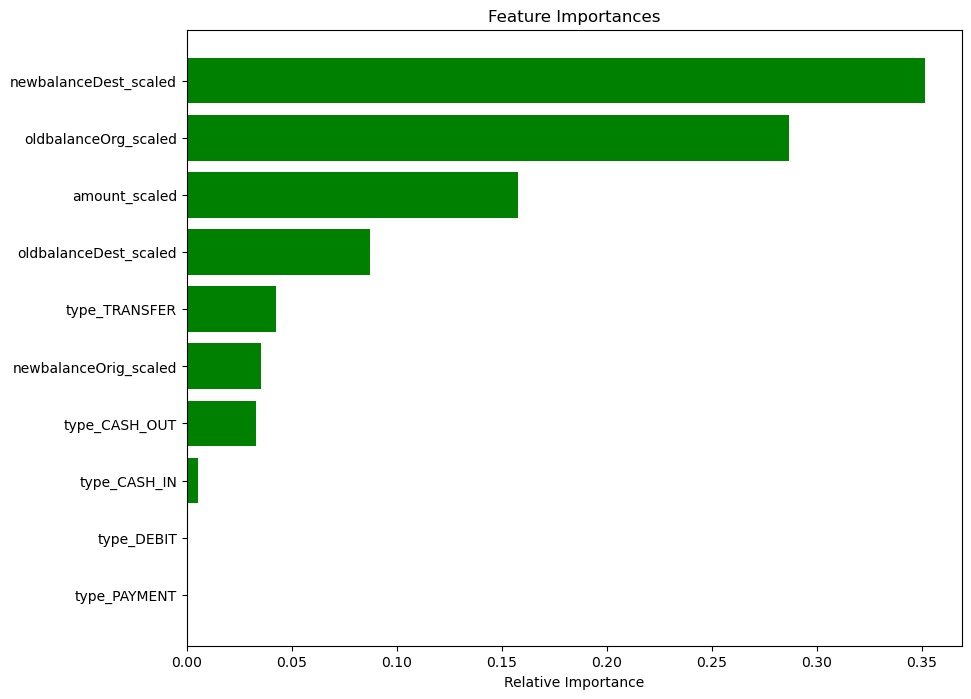

In [21]:
# Predict on the test set using the best model

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print accuracy and best parameters
print('Accuracy', accuracy_score(y_test, y_pred))
print('Best parameters:', grid_search.best_params_)

# Visualize feature importances
features = X.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()